In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('movie_metadata.csv')

In [4]:
data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [5]:
data.shape

(5043, 28)

In [6]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

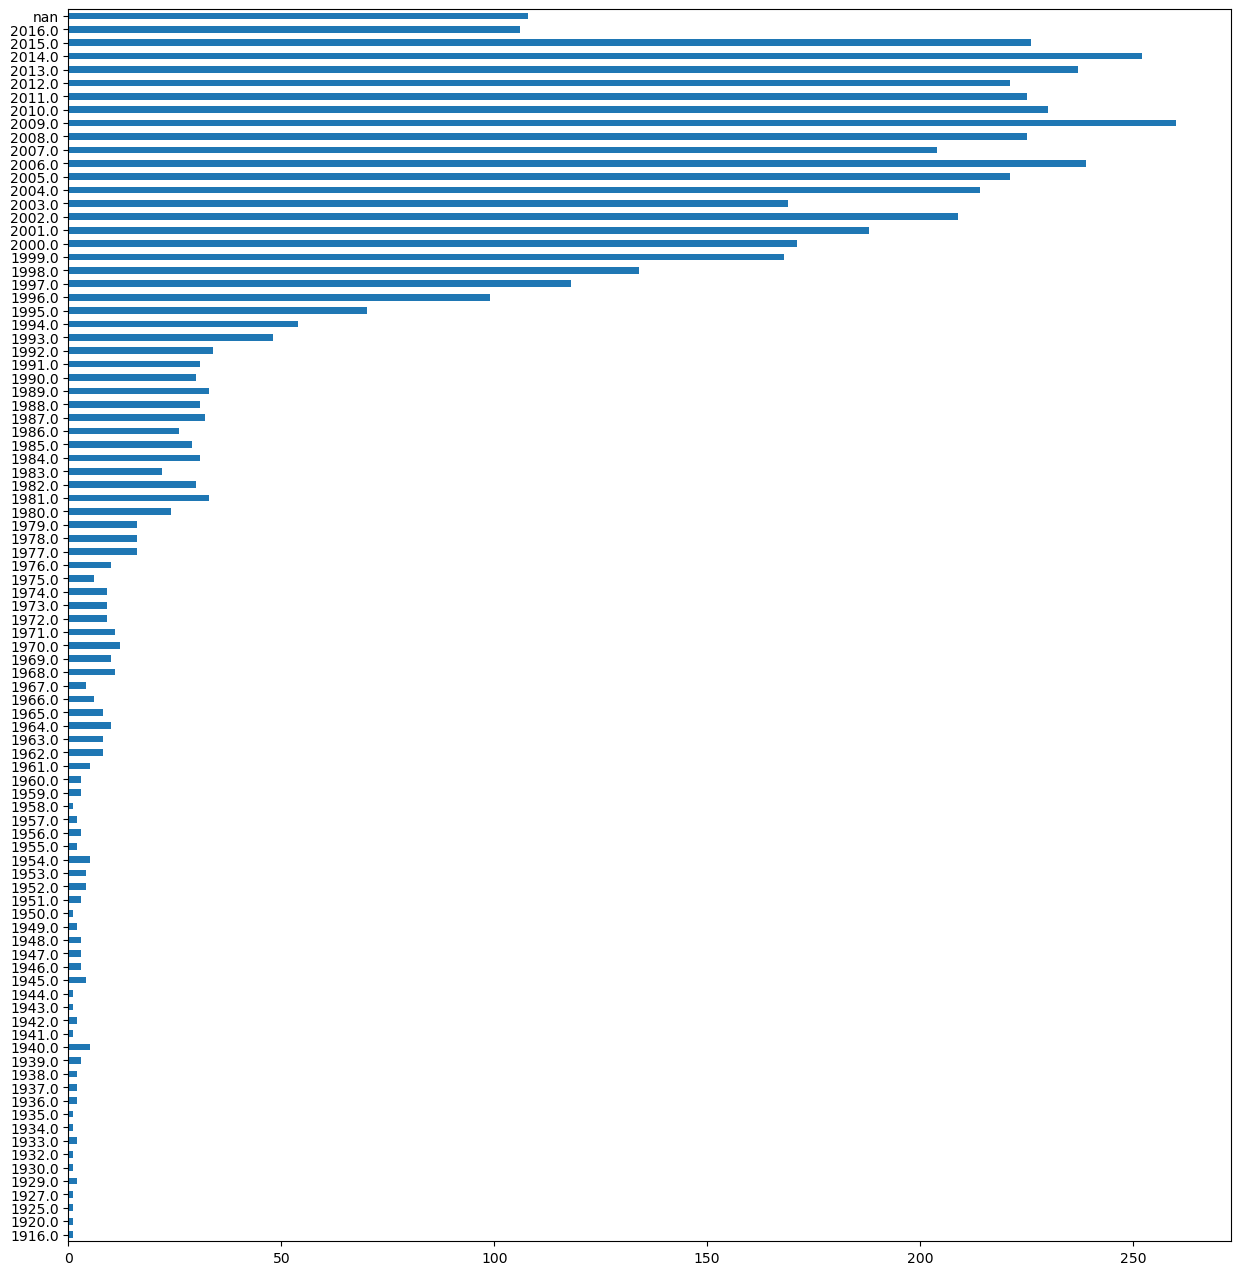

In [7]:
# we have movies only upto 2016
import matplotlib.pyplot as plt
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [8]:
# recommendation will be based on these features only
data = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [9]:
data.head(10)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter
6,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action|Adventure|Romance,Spider-Man 3
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi,Avengers: Age of Ultron
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince


In [10]:
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

In [11]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling


In [12]:
data['genres'] = data['genres'].str.replace('|', ' ')

C:\Users\skdha\AppData\Local\Temp\ipykernel_8508\3923011829.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['genres'] = data['genres'].str.replace('|', ' ')


In [13]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,Shanghai Calling


In [14]:
data['movie_title'] = data['movie_title'].str.lower()

In [15]:
# null terminating char at the end
data['movie_title'][1]

"pirates of the caribbean: at world's end\xa0"

In [16]:
# removing the null terminating char at the end
data['movie_title'] = data['movie_title'].apply(lambda x : x[:-1])

In [17]:
data['movie_title'][1]

"pirates of the caribbean: at world's end"

In [18]:
data.to_csv('data.csv',index=False)

## Second dataset preprocessing

In [19]:
import numpy as np
import pandas as pd

In [20]:
credits = pd.read_csv('credits.csv')

In [21]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [22]:
meta = pd.read_csv('movies_metadata.csv')

C:\Users\skdha\AppData\Local\Temp\ipykernel_8508\2048473160.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('movies_metadata.csv')


In [23]:
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce')

In [24]:

meta['year'] = meta['release_date'].dt.year

In [25]:
meta['year'].value_counts().sort_index()

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

In [26]:
# Getting only 2017 movies as we already have movies up to the year 2016 in preprocessing 1 file. 
# We don't have enough data for the movies from 2018, 2019 and 2020. 
# We'll deal with it in the upcoming preprocessing files
new_meta = meta.loc[meta.year == 2017,['genres','id','title','year']]

In [27]:

new_meta

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",404604,Mom,2017.0


In [28]:
new_meta['id'] = new_meta['id'].astype(int)

In [29]:
data = pd.merge(new_meta, credits, on='id')

In [30]:
pd.set_option('display.max_colwidth', 75)
data

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', ..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', ..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'ge..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '5...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gend..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', '..."
...,...,...,...,...,...,...
526,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_id': '597e2086c3a368544001...","[{'credit_id': '597e22f69251415d7801c74a', 'department': 'Directing', '..."
527,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017.0,"[{'cast_id': 0, 'character': 'Detective Simmons', 'credit_id': '593ba04...","[{'credit_id': '593ba0c29251410593009be3', 'department': 'Writing', 'ge..."
528,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017.0,[],"[{'credit_id': '5981a15c92514151e0011b51', 'department': 'Sound', 'gend..."
529,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal', 'credit_id': '577809adc3...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'department': 'Sound', 'gend..."


In [31]:
# evaluates an expression node or a string containing a Python literal or container display
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

In [32]:
def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen))

In [33]:
data['genres_list'] = data['genres'].map(lambda x: make_genresList(x))

In [34]:
data['genres_list']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object

In [35]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [36]:
data['actor_1_name'] = data['cast'].map(lambda x: get_actor1(x))

In [37]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [38]:
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2(x))

In [39]:
data['actor_2_name']

0       Javier Bardem
1        Henry Cavill
2      Tom Hiddleston
3         Zoe Saldana
4        William Hurt
            ...      
526     Rosa Honkonen
527     Wallace Shawn
528               NaN
529         Sajal Ali
530               NaN
Name: actor_2_name, Length: 531, dtype: object

In [40]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [41]:
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3(x))

In [42]:
data['actor_3_name']

0        Geoffrey Rush
1            Gal Gadot
2       Cate Blanchett
3        Dave Bautista
4      Benjamin Walker
            ...       
526     Tiitus Rantala
527        Gina Holden
528                NaN
529     Akshaye Khanna
530                NaN
Name: actor_3_name, Length: 531, dtype: object

In [43]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))

In [44]:
data['director_name'] = data['crew'].map(lambda x: get_directors(x))

In [45]:
data['director_name']

0      Joachim Rønning Espen Sandberg
1                         Zack Snyder
2                       Taika Waititi
3                          James Gunn
4                       Sean McNamara
                    ...              
526                  Hannaleena Hauru
527             Jonathan A. Rosenbaum
528          Beth David Esteban Bravo
529                      Ravi Udyawar
530                     Daisy Asquith
Name: director_name, Length: 531, dtype: object

In [46]:
movie = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

In [47]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
...,...,...,...,...,...,...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,Thick Lashes of Lauri Mäntyvaara
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,Cop and a Half: New Recruit
528,Beth David Esteban Bravo,NaN,NaN,NaN,Family Animation Romance Comedy,In a Heartbeat
529,Ravi Udyawar,Sridevi Kapoor,Sajal Ali,Akshaye Khanna,Crime Drama Thriller,Mom


In [48]:
movie.isna().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [49]:
movie = movie.dropna(how='any')

In [50]:
movie.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres_list      0
title            0
dtype: int64

In [51]:
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})

In [52]:
movie['movie_title'] = movie['movie_title'].str.lower()

In [53]:
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']

In [54]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachim Rønning Espen Sandberg ...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder Action Adventure Fantasy...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett Taika Waititi Action Adve...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gunn Action Adventure Comed...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Sean McNamara Fantasy Actio...
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [55]:
old = pd.read_csv('data.csv')

In [56]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling


In [57]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']

In [58]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered,Eric Mabius Daphne Zuniga Crystal Lowe Scott Smith Comedy Drama
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following,Natalie Zea Valorie Curry Sam Underwood unknown Crime Drama Mystery Thr...
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant,Eva Boehnke Maxwell Moody David Chandler Benjamin Roberds Drama Horror ...
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling,Alan Ruck Daniel Henney Eliza Coupe Daniel Hsia Comedy Drama Romance


In [59]:
new = old.append(movie)

C:\Users\skdha\AppData\Local\Temp\ipykernel_8508\3034453481.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = old.append(movie)


In [60]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [61]:
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)

In [62]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [63]:
new.to_csv('new_data.csv',index=False)

In [78]:
new = pd.read_csv('new_data.csv')

## Cosine similarity

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [80]:
cv = CountVectorizer(max_features=5364,stop_words='english')
vector = cv.fit_transform(new['comb']).toarray()

In [81]:
similarity = cosine_similarity(vector)

In [82]:
print(cosine_similarity)

<function cosine_similarity at 0x000002279DB62C10>


In [96]:
def recommend(movie):
    index = new[new['movie_title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(i)
        print(new.iloc[i[0]].movie_title.title())
        
    
recommend('interstellar')

(185, 0.4364357804719848)
Godzilla Resurgence
(811, 0.4166666666666668)
Stargate Sg-1            
(339, 0.4003203845127179)
Contact
(1175, 0.4003203845127179)
The Prestige
(86, 0.38575837490522985)
Inception


In [88]:
import pickle
pickle.dump(new,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

In [95]:
new.to_dict()

{'director_name': {0: 'James Cameron',
  1: 'Gore Verbinski',
  2: 'Sam Mendes',
  3: 'Christopher Nolan',
  4: 'Doug Walker',
  5: 'Andrew Stanton',
  6: 'Nathan Greno',
  7: 'Joss Whedon',
  8: 'David Yates',
  9: 'Zack Snyder',
  10: 'Bryan Singer',
  11: 'Marc Forster',
  12: 'Gore Verbinski',
  13: 'Gore Verbinski',
  14: 'Zack Snyder',
  15: 'Andrew Adamson',
  16: 'Rob Marshall',
  17: 'Barry Sonnenfeld',
  18: 'Peter Jackson',
  19: 'Marc Webb',
  20: 'Ridley Scott',
  21: 'Peter Jackson',
  22: 'Chris Weitz',
  23: 'James Cameron',
  24: 'Anthony Russo',
  25: 'Peter Berg',
  26: 'Colin Trevorrow',
  27: 'Sam Raimi',
  28: 'Shane Black',
  29: 'Brett Ratner',
  30: 'Dan Scanlon',
  31: 'Michael Bay',
  32: 'Michael Bay',
  33: 'Marc Webb',
  34: 'John Lasseter',
  35: 'Martin Campbell',
  36: 'Lee Unkrich',
  37: 'McG',
  38: 'James Wan',
  39: 'Marc Forster',
  40: 'Bryan Singer',
  41: 'J.J. Abrams',
  42: 'Bryan Singer',
  43: 'Mike Newell',
  44: 'Guillermo del Toro',
  45

In [115]:
import streamlit

In [116]:
streamlit.__version__

'1.22.0'

In [105]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '8265bd1679663a7ea12ac168da84d2e8&language=en-US'

In [106]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    movie_id = result[0].id
    print(movie_id)
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US'.format(movie_id))
    data_json = response.json()
    print(data_json)
    poster_path = data['poster_path']
    full_path = "https://image.tmdb.org/t/p/w500/" + poster_path
    return 1 #full_path

In [107]:
get_genre('interstellar')

157336


1